<a href="https://colab.research.google.com/github/sintiakn/projectMedicalCost/blob/main/Medical_Cost_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MEDICAL COST PERSONAL**
---
Data Dictionary
1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance

**By: Amanah and Sinthiya**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df=df.drop_duplicates(keep='first')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


#**EDA**

In [ ]:
import seaborn as sns

**Charges**

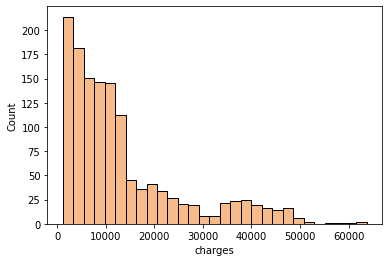

In [ ]:
sns.histplot(df['charges'], color='sandybrown')

Distribusi ‘charges’ yaitu skewed positif dimana jumlah klaim paling banyak pada ‘charges’  yang relatif rendah yaitu sekitar 10.000. Kemungkinan kebanyakan orang hanya mengklaim biaya kesehatan yang ringan.

**Charges by age**

In [ ]:
import matplotlib.pyplot as plt

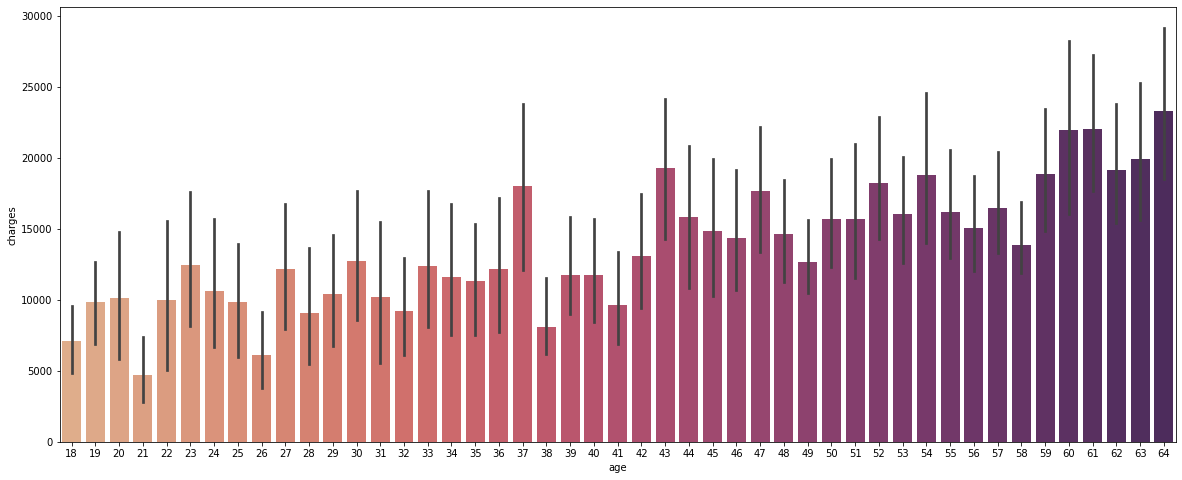

In [ ]:
f, ax=plt.subplots(1,1,figsize=(20,8))
ax=sns.barplot(data=df, x='age', y='charges', palette='flare')

Semakin bertambah ‘age’, maka memiliki kecenderungan semakin besar pula ‘charges’ yang dikeluarkan.

**Charges by smoker**

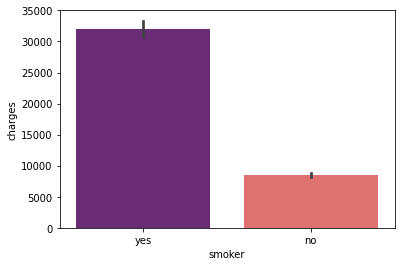

In [ ]:
sns.barplot(data=df, x='smoker', y='charges', palette='magma')

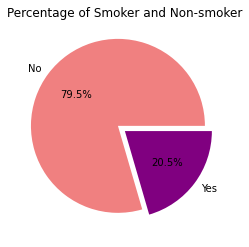

In [ ]:
label='No','Yes'
size=df.smoker.value_counts()
plt.pie(size, labels=label, colors=['lightcoral','purple'], explode=[0.1,0], autopct='%1.1f%%')
plt.title("Percentage of Smoker and Non-smoker")
plt.show()

Jumlah perokok lebih sedikit daripada tidak perokok, namun perokok akan cenderung memiliki ‘charges’ lebih tinggi dibandingkan dengan tidak perokok. Seorang perokok menghabiskan lebih banyak biaya klaim.

**Charges by BMI**

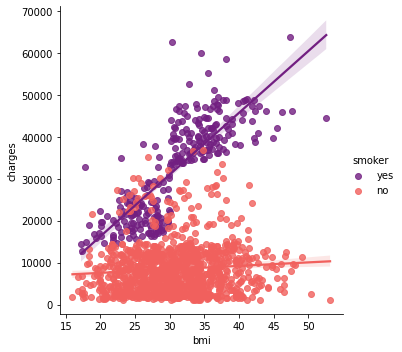

In [ ]:
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='magma')

Di kalangan perokok, ‘charges’ cenderung meningkat yang signifikan seiring dengan tingginya ‘BMI’.

**Charges by children**

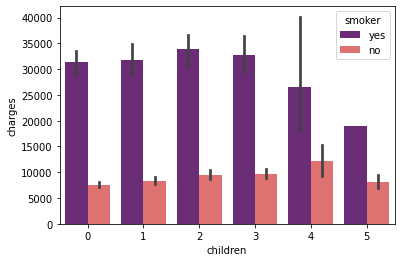

In [ ]:
sns.barplot(x='children', y='charges', data=df, hue='smoker', palette='magma')

Seseorang yang memiliki jumlah anak 5 cenderung memiliki ‘charges’ yang paling sedikit, baik yang merokok dan tidak merokok. 

**Charges by sex**

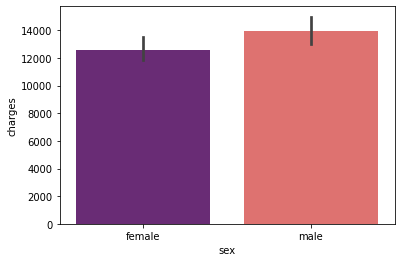

In [ ]:
sns.barplot(data=df, x='sex', y='charges', palette='magma')

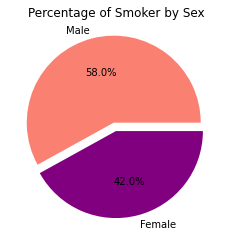

In [ ]:
label='Male','Female'
df_model=df[(df.smoker=='yes')]
size=df_model.sex.value_counts()
plt.pie(size, labels=label, colors=['salmon','purple'], explode=[0.1,0], autopct='%1.1f%%')
plt.title("Percentage of Smoker by Sex")
plt.show()

Laki-laki cenderung memiliki ‘charges’ yang lebih tinggi dibandingkan dengan perempuan karena jumlah laki-laki perokok lebih banyak.

**Charges by region**

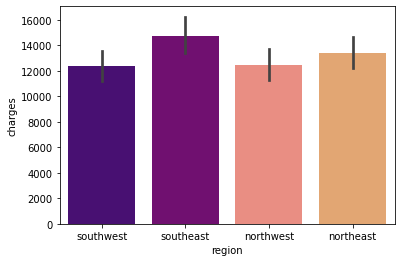

In [ ]:
sns.barplot(x='region',y='charges',data=df,palette=['indigo','purple','salmon','sandybrown'])

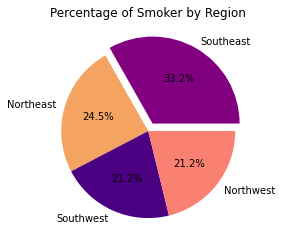

In [ ]:
label='Southeast','Northeast','Southwest','Northwest'
df_model=df[(df.smoker=='yes')]
size=df_model.region.value_counts()
plt.pie(size, labels=label, colors=['purple','sandybrown','indigo','salmon'], explode=[0.1,0,0,0], autopct='%1.1f%%')
plt.title("Percentage of Smoker by Region")
plt.show()

Seseorang yang bertempat tinggal di wilayah southeast cenderung memiliki ‘charges’ yang lebih tinggi daripada wilayah lain. Jika dilihat keterkaitan dengan jumlah perokok, di daerah tersebut terdapat jumlah perokok yang lebih banyak dibandingkan dengan wilayah lain. Hal ini berbanding lurus dengan nilai ‘charges’ yang lebih tinggi juga.

#**Data Preprocessing**

In [ ]:
df=pd.get_dummies(df,columns=['region','sex','smoker'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df['bmi'] = StandardScaler().fit_transform(df['bmi'].values.reshape(len(df), 1))
df['children'] = StandardScaler().fit_transform(df['children'].values.reshape(len(df), 1))
df['age'] = StandardScaler().fit_transform(df['age'].values.reshape(len(df), 1))

In [ ]:
df.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,-1.440418,-0.453160,-0.909234,16884.92400,0,0,0,1,1,0,0,1
1,-1.511647,0.509422,-0.079442,1725.55230,0,0,1,0,0,1,1,0
2,-0.799350,0.383155,1.580143,4449.46200,0,0,1,0,0,1,1,0
3,-0.443201,-1.305052,-0.909234,21984.47061,0,1,0,0,0,1,1,0
4,-0.514431,-0.292456,-0.909234,3866.85520,0,1,0,0,0,1,1,0


1. Untuk memudahkan dalam pemodelan data, maka data kategorik akan diubah menjadi numerik dengan one-hot encoding untuk features ‘region’, ‘sex’, dan ‘smoker’.
2. Dilakukan standarisasi untuk features numerik, yaitu ‘age’, ‘bmi’, ‘children’.


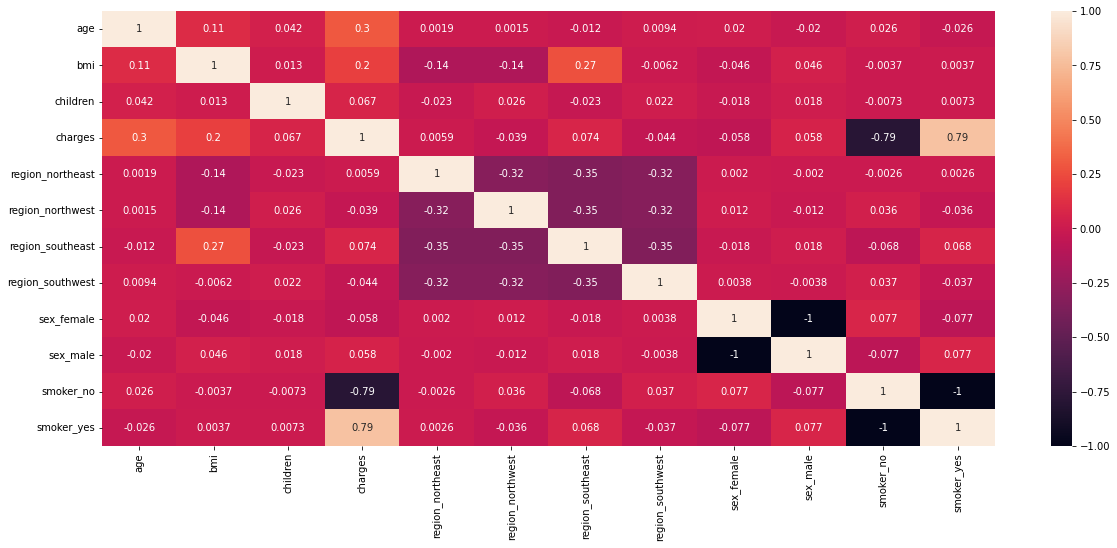

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(20,8))
sns.color_palette("Set2")
ax = sns.heatmap(df.corr(), annot=True)

‘smoker_yes’ memiliki korelasi positif yang paling tinggi terhadap ‘charges’ sebesar 0.79 dan diikuti oleh ‘age’  sebesar 0.3 serta ‘bmi’ sebesar 0.2.


## **Features Selection**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [ ]:
train_df,test_df=train_test_split(df,train_size=0.75, random_state=3)

In [ ]:
features=['age','sex_female','sex_male','smoker_no','smoker_yes',
          'bmi','children','region_northeast','region_northwest',
          'region_southeast','region_southwest']


#**Modelling**

In [ ]:
Evaluation=pd.DataFrame({'Model':[],
                         'RMSE':[],
                         'R Squared (training)':[],
                         'Adjusted R-Squared (training)':[],
                         'R Squared (testing)':[],
                         'Adjusted R-Squared (testing)':[],
                         '5-Fold Cross Validation':[]})

In [ ]:
def adjustedR2(r2,n,k):
  return r2-(k-1)/(n-k)*(1-r2)

**Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
simple_model = LinearRegression()
simple_model.fit(train_df[features],train_df['charges'])

LinearRegression()

In [ ]:
from sklearn import metrics

In [ ]:
pred=simple_model.predict(test_df[features])
rmse=float(format(np.sqrt(metrics.mean_squared_error(test_df['charges'],pred)),'.3f'))
r2train=float(format(simple_model.score(train_df[features],train_df['charges']),'.3f'))
adtrain=float(format(adjustedR2(simple_model.score(train_df[features],train_df['charges']),train_df.shape[0],len(features)),'.3f'))
r2test=float(format(simple_model.score(test_df[features],test_df['charges']),'.3f'))
adtest=float(format(adjustedR2(simple_model.score(test_df[features],test_df['charges']),test_df.shape[0],len(features)),'.3f'))
cv=float(format(cross_val_score(simple_model,df[features],df['charges'],cv=5).mean(),'.3f'))
r=Evaluation.shape[0]
Evaluation.loc[r]=['Linear Regression',rmse,r2train,adtrain,r2test,adtest,cv]
Evaluation

,Model,RMSE,R Squared (training),Adjusted R-Squared (training),R Squared (testing),Adjusted R-Squared (testing),5-Fold Cross Validation
0,Linear Regression,6105.03,0.754,0.751,0.737,0.729,0.747


**Bayesian** **Ridge**

In [ ]:
from sklearn.linear_model import BayesianRidge
model= BayesianRidge()
model.fit(train_df[features],train_df['charges'])

BayesianRidge()

In [ ]:
pred=model.predict(test_df[features])
rmse=float(format(np.sqrt(metrics.mean_squared_error(test_df['charges'],pred)),'.3f'))
r2train=float(format(model.score(train_df[features],train_df['charges']),'.3f'))
adtrain=float(format(adjustedR2(model.score(train_df[features],train_df['charges']),train_df.shape[0],len(features)),'.3f'))
r2test=float(format(model.score(test_df[features],test_df['charges']),'.3f'))
adtest=float(format(adjustedR2(model.score(test_df[features],test_df['charges']),test_df.shape[0],len(features)),'.3f'))
cv=float(format(cross_val_score(model,df[features],df['charges'],cv=5).mean(),'.3f'))
r=Evaluation.shape[0]
Evaluation.loc[r]=['Bayesian Ridge',rmse,r2train,adtrain,r2test,adtest,cv]
Evaluation

,Model,RMSE,R Squared (training),Adjusted R-Squared (training),R Squared (testing),Adjusted R-Squared (testing),5-Fold Cross Validation
0,Linear Regression,6105.030,0.754,0.751,0.737,0.729,0.747
1,Bayesian Ridge,6098.378,0.754,0.751,0.738,0.730,0.747


**XGB**

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(train_df[features],train_df['charges'])

[06:56:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
pred=xgb_model.predict(test_df[features])
rmsec=float(format(np.sqrt(metrics.mean_squared_error(test_df['charges'],pred)),'.3f'))
r2train=float(format(xgb_model.score(train_df[features],train_df['charges']),'.3f'))
adtrain=float(format(adjustedR2(xgb_model.score(train_df[features],train_df['charges']),train_df.shape[0],len(features)),'.3f'))
r2test=float(format(xgb_model.score(test_df[features],test_df['charges']),'.3f'))
adtesttrain=float(format(adjustedR2(xgb_model.score(test_df[features],test_df['charges']),test_df.shape[0],len(features)),'.3f'))
cv=float(format(cross_val_score(xgb_model,df[features],df['charges'],cv=5).mean(),'.3f'))
r=Evaluation.shape[0]
Evaluation.loc[r]=['XGB Regression',rmse,r2train,adtrain,r2test,adtest,cv]
Evaluation

[06:56:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model,RMSE,R Squared (training),Adjusted R-Squared (training),R Squared (testing),Adjusted R-Squared (testing),5-Fold Cross Validation
0,Linear Regression,6105.030,0.754,0.751,0.737,0.729,0.747
1,Bayesian Ridge,6098.378,0.754,0.751,0.738,0.730,0.747
2,XGB Regression,6098.378,0.899,0.898,0.870,0.730,0.857


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(train_df[features],train_df['charges'])

GradientBoostingRegressor()

In [ ]:
pred=gbr.predict(test_df[features])
rmse=float(format(np.sqrt(metrics.mean_squared_error(test_df['charges'],pred)),'.3f'))
r2train=float(format(gbr.score(train_df[features],train_df['charges']),'.3f'))
adtrain=float(format(adjustedR2(gbr.score(train_df[features],train_df['charges']),train_df.shape[0],len(features)),'.3f'))
r2test=float(format(gbr.score(test_df[features],test_df['charges']),'.3f'))
adtest=float(format(adjustedR2(gbr.score(test_df[features],test_df['charges']),test_df.shape[0],len(features)),'.3f'))
cv=float(format(cross_val_score(gbr,df[features],df['charges'],cv=5).mean(),'.3f'))
r=Evaluation.shape[0]
Evaluation.loc[r]=['Gradient Boosting',rmse,r2train,adtrain,r2test,adtest,cv]
Evaluation

,Model,RMSE,R Squared (training),Adjusted R-Squared (training),R Squared (testing),Adjusted R-Squared (testing),5-Fold Cross Validation
0,Linear Regression,6105.030,0.754,0.751,0.737,0.729,0.747
1,Bayesian Ridge,6098.378,0.754,0.751,0.738,0.730,0.747
2,XGB Regression,6098.378,0.899,0.898,0.870,0.730,0.857
3,Gradient Boosting,4286.888,0.904,0.903,0.870,0.866,0.855


Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model= ab=AdaBoostRegressor()
model.fit(train_df[features],train_df['charges'])

AdaBoostRegressor()

In [ ]:
pred=model.predict(test_df[features])
rmse=float(format(np.sqrt(metrics.mean_squared_error(test_df['charges'],pred)),'.3f'))
r2train=float(format(model.score(train_df[features],train_df['charges']),'.3f'))
adtrain=float(format(adjustedR2(model.score(train_df[features],train_df['charges']),train_df.shape[0],len(features)),'.3f'))
r2test=float(format(model.score(test_df[features],test_df['charges']),'.3f'))
adtest=float(format(adjustedR2(model.score(test_df[features],test_df['charges']),test_df.shape[0],len(features)),'.3f'))
cv=float(format(cross_val_score(model,df[features],df['charges'],cv=5).mean(),'.3f'))
r=Evaluation.shape[0]
Evaluation.loc[r]=['Ada Boost',rmse,r2train,adtrain,r2test,adtest,cv]
Evaluation

,Model,RMSE,R Squared (training),Adjusted R-Squared (training),R Squared (testing),Adjusted R-Squared (testing),5-Fold Cross Validation
0,Linear Regression,6105.030,0.754,0.751,0.737,0.729,0.747
1,Bayesian Ridge,6098.378,0.754,0.751,0.738,0.730,0.747
2,XGB Regression,6098.378,0.899,0.898,0.870,0.730,0.857
3,Gradient Boosting,4286.888,0.904,0.903,0.870,0.866,0.855
4,Ada Boost,4820.208,0.835,0.834,0.836,0.831,0.824


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 

In [ ]:
model= KNeighborsRegressor()
model.fit(train_df[features],train_df['charges'])

KNeighborsRegressor()

In [ ]:
pred=model.predict(test_df[features])
rmse=float(format(np.sqrt(metrics.mean_squared_error(test_df['charges'],pred)),'.3f'))
r2train=float(format(model.score(train_df[features],train_df['charges']),'.3f'))
adtrain=float(format(adjustedR2(model.score(train_df[features],train_df['charges']),train_df.shape[0],len(features)),'.3f'))
r2test=float(format(model.score(test_df[features],test_df['charges']),'.3f'))
adtest=float(format(adjustedR2(model.score(test_df[features],test_df['charges']),test_df.shape[0],len(features)),'.3f'))
cv=float(format(cross_val_score(model,df[features],df['charges'],cv=5).mean(),'.3f'))
r=Evaluation.shape[0]
Evaluation.loc[r]=['KNeighborsRegressor',rmse,r2train,adtrain,r2test,adtest,cv]
Evaluation

,Model,RMSE,R Squared (training),Adjusted R-Squared (training),R Squared (testing),Adjusted R-Squared (testing),5-Fold Cross Validation
0,Linear Regression,6105.030,0.754,0.751,0.737,0.729,0.747
1,Bayesian Ridge,6098.378,0.754,0.751,0.738,0.730,0.747
2,XGB Regression,6098.378,0.899,0.898,0.870,0.730,0.857
3,Gradient Boosting,4286.888,0.904,0.903,0.870,0.866,0.855
4,Ada Boost,4820.208,0.835,0.834,0.836,0.831,0.824
5,KNeighborsRegressor,5452.854,0.842,0.841,0.790,0.784,0.753


Berdasarkan kelima model di tabel tersebut, didapatkan model terbaik yaitu Gradient Boosting Regression.
Selanjutnya, akan dilakukan hyperparameter pada Gradient Boosting Regression.


**Hyperparameter Gradient Boosting**

In [ ]:
 GBR = GradientBoostingRegressor()

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(train_df[features],train_df['charges'])

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.1)

 The best score across ALL searched params:
 0.8413823450865188

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1}


In [ ]:
pred=grid_GBR.predict(test_df[features])
rmse=float(format(np.sqrt(metrics.mean_squared_error(test_df['charges'],pred)),'.3f'))
r2train=float(format(grid_GBR.score(train_df[features],train_df['charges']),'.3f'))
adtrain=float(format(adjustedR2(grid_GBR.score(train_df[features],train_df['charges']),train_df.shape[0],len(features)),'.3f'))
r2test=float(format(grid_GBR.score(test_df[features],test_df['charges']),'.3f'))
adtest=float(format(adjustedR2(grid_GBR.score(test_df[features],test_df['charges']),test_df.shape[0],len(features)),'.3f'))

In [ ]:
cv=float(format(cross_val_score(grid_GBR,df[features],df['charges'],cv=5).mean(),'.3f'))
r=Evaluation.shape[0]

In [ ]:
Evaluation.loc[r]=['Gradient Boosting Regressor',rmse,r2train,adtrain,r2test,adtest,cv]
Evaluation

,Model,RMSE,R Squared (training),Adjusted R-Squared (training),R Squared (testing),Adjusted R-Squared (testing),5-Fold Cross Validation
0,Linear Regression,6105.030,0.754,0.751,0.737,0.729,0.747
1,Bayesian Ridge,6098.378,0.754,0.751,0.738,0.730,0.747
2,XGB Regression,6098.378,0.899,0.898,0.870,0.730,0.857
3,Gradient Boosting,4286.888,0.904,0.903,0.870,0.866,0.855
4,Ada Boost,4820.208,0.835,0.834,0.836,0.831,0.824
5,KNeighborsRegressor,5452.854,0.842,0.841,0.790,0.784,0.753
6,Gradient Boosting Regressor,4441.746,0.876,0.875,0.861,0.857,0.858


In [ ]:
##Predicting the charges
y_test_pred = grid_GBR.predict(test_df[features])
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': test_df['charges'], 'Predicted': pred})
df


,Actual,Predicted
856,40974.16490,38420.952162
778,5934.37980,6686.281609
65,1743.21400,2552.464298
624,12129.61415,12866.251972
1007,24915.22085,25670.092369
...,...,...
1231,20167.33603,17789.737270
1151,12235.83920,15782.416539
1178,2899.48935,5646.159646
235,19444.26580,20733.880305


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


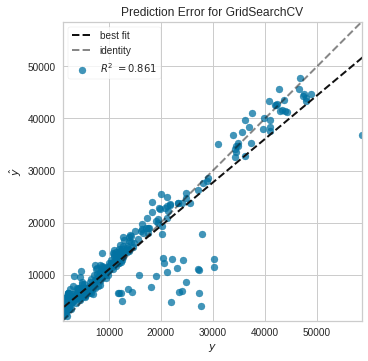

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(grid_GBR)
visualizer.fit(train_df[features], train_df['charges'])  
visualizer.score(test_df[features], test_df['charges'])        
visualizer.show();

Gambar di atas merupakan hasil prediksi charges dari model tersebut terhadap data aktual ‘charges’. Terlihat hasil prediksi mendekati hasil aktual dengan R square sebesar 0.87 dan error sebesar 0.095%
